# Algoritmo k-medias

La agrupación en clústeres de k-medias es un método de cuantificación vectorial, que es popular para el análisis de clústeres en la minería de datos. El agrupamiento de k-medias tiene como objetivo dividir n observaciones en k grupos en los que cada observación pertenece al grupo con la media más cercana, sirviendo como un prototipo del grupo.

* k-means busca dividir n observaciones en k particiones.
* el centro de una partición se conoce como centroide
* el centroide del grupo representa la media o la nueva media.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Datos Aleatorios

Vamos a generar un dataset no etiquetado donde vamos a intentar utilizar el algoritmo k-medias para reconocer los clústeres. En nuestro dataset existe una separación evidente para facilitar la comprensión del algoritmo.

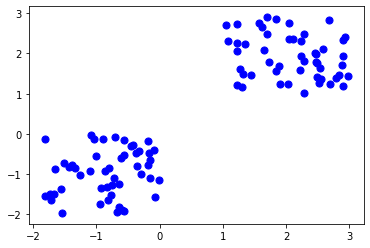

In [2]:
seed = 31 
np.random.seed(seed)
X = -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1
plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = 'b')

## K Centroides

El primer paso para utilizar k-medias es definir una serie de puntos aleatorios (X1,X2) que van a servir para ubicar los clústeres. Como nuestro dataset visiblemente tiene 2 clústeres, vamos entonces a definir k = 2.

En geometria, se llama centroide o baricentro al punto donde se produce la intersección de las medianas que forman parte de un triángulo. Cabe recordar que una mediana es una recta que se traza desde un vértice de la figura hasta el punto que está en el medio del lado opuesto.


<img src="https://definicion.de/wp-content/uploads/2016/08/centroide.jpg" alt="centroide">

El siguiente código genera 2 centroides con posiciones X1,X2 aleatorias en el ámbito de los datos de nuestro dataset.

In [3]:
np.random.seed(seed)
k = 2
min_x1, max_x1 = np.round(np.min(X[ : , 0])), np.round(np.max(X[ : , 0]))
min_x2, max_x2 = np.round(np.min(X[ : , 1])), np.round(np.max(X[ : , 1]))

centroids = {
    i+1: [np.random.randint(min_x1, max_x1), np.random.randint(min_x2, max_x2)]
    for i in range(k)
}

print(centroids)

{1: [0, -2], 2: [0, 0]}


Vamos a imprimir los centroides generados con una marca roja y otra verde para visualizar su ubicación.

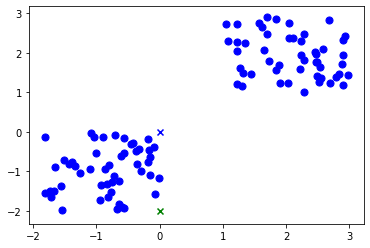

In [4]:
np.random.seed(seed)
X = -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1
plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = 'b')

# imprimir los centroides generados
colmap = {1: 'g', 2: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], marker="x")

## Distancia Euclidiana

Vamos a utilizar la fórmula de la distancia euclidiana (revisar Semana 5 - vecinos más cercanos para mas detalle) para calcular la distancia de cada punto hacia los centroides. 

In [5]:
def Distance(x,c1,c2):
    X1 = x[:,0]
    X2 = x[:,1]
    SquareDiff_X1 = (c1 - X1)**2
    SquareDiff_X2 = (c2 - X2)**2
    Sum_X1_X2 = SquareDiff_X1 + SquareDiff_X2
    Euclidean_Distance = np.sqrt(Sum_X1_X2)
    return Euclidean_Distance

Distances = {
    i: [Distance(X, *centroids[i])]
    for i in centroids.keys()
}

# Vamos a generar un dataframe para las distancias y el centroide mas cercano
df = pd.DataFrame(columns=['X1','X2','Dist_1', 'Dist_2', 'CloseTo'])
df["X1"] = X[:,0]
df["X2"] = X[:,1]
df["Dist_1"] = np.array(Distances[1]).T
df["Dist_2"] = np.array(Distances[2]).T
df["CloseTo"] = [2 if x >= y else 1 for x,y in zip(df["Dist_1"],df["Dist_2"])]

df.head()

,X1,X2,Dist_1,Dist_2,CloseTo
0,-0.572108,-1.916211,0.578211,1.999793,1
1,-1.540626,-1.973740,1.540850,2.503833,1
2,-0.416331,-0.273834,1.775663,0.498314,2
3,-1.816748,-0.137277,2.601982,1.821927,2
4,-0.150665,-1.087069,0.925280,1.097461,1


Vamos a colorear los puntos basados en el centroide mas cercano.

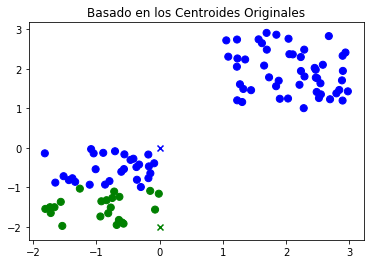

In [6]:
colors = ["g" if x == 1 else "b" for x in df["CloseTo"]]
plt.scatter(df["X1"], df["X2"], s = 50, c = colors )
plt.title("Basado en los Centroides Originales")

# imprimir los centroides generados
colmap = {1: 'g', 2: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], marker="x")

## Recalcular los Centroides basados en la nueva media del grupo

Los centroides originales causaron una separacion del dataset en dos. Ahora toca mover los centroides para que se ubiquen nuevamente en el centro de los grupos.

In [ ]:
import copy
old_centroids = copy.deepcopy(centroids)

def UpdateCentroids(cents):
    for i in cents.keys():
        cents[i][0] = np.mean(df[df['CloseTo'] == i]['X1'])
        cents[i][1] = np.mean(df[df['CloseTo'] == i]['X2'])
    return cents

new_centroids = UpdateCentroids(old_centroids)


np.random.seed(seed)
X = -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1
plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = 'gray')

# imprimir los centroides iniciales y los nuevos centroides
colmap = {1: 'g', 2: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], marker="x", s = 60, alpha= 0.3)
    plt.scatter(*new_centroids[i], color=colmap[i], marker="x", s = 60)

Como pueden observar, los datos se mantiene iguales. pero los centroides se han movido al centro del grupo. Ahora volvemos a repetir el proceso de colorear los datos basados en los nuevos centroides.

In [ ]:
Distances = {
    i: [Distance(X, *new_centroids[i])]
    for i in new_centroids.keys()
}

df = pd.DataFrame(columns=['X1','X2','Dist_1', 'Dist_2', 'CloseTo'])
df["X1"] = X[:,0]
df["X2"] = X[:,1]
df["Dist_1"] = np.array(Distances[1]).T
df["Dist_2"] = np.array(Distances[2]).T
df["CloseTo"] = [2 if x >= y else 1 for x,y in zip(df["Dist_1"],df["Dist_2"])]

colors = ["g" if x == 1 else "b" for x in df["CloseTo"]]
plt.scatter(df["X1"], df["X2"], s = 50, c = colors )
plt.title("Con los nuevos Centroides")

# imprimir los centroides generados
colmap = {1: 'g', 2: 'b'}
for i in centroids.keys():
    plt.scatter(*new_centroids[i], color=colmap[i], marker="x", s=120)

Este proceso se repite n veces. Sklearn define este hiperparametro como (max_iterint, default=300).

Para la escogencia de k existen múltiples criterios. Los dos más comunes son: 

* Criterio experto: Se sabe de antemano cuantos grupos existen, o bien, se tienen una idea cercana de las agrupaciones.
* El metodo del codo (Elbow Method): El método del codo ejecuta la agrupación de k-medias en el conjunto de datos para un rango de valores para k (digamos de 1 a 10) y luego, para cada valor de k, calcula una puntuación promedio para todos los grupos.

Vamos a ver el metodo del codo mas adelante con Sklearn.